# Histogram equalization
---

Using the following algorithm, implement histogram equalization:

1. Calculate normalized histogram: Normalization is performed by dividing the frequency of each bin by the total number of pixels in the image.
2. Cumulative distribution function of the histogram: Find the cumulative sum of the normalized histogram:

    $\sum_{i=0}^j P_x(i)$

    Where $P_x$ is the normalized histogram.

3. Derive intensity-mapping lookup table: Map the new pixel intensities to each pixel of the image. For each discrete intensity level i, the mapped pixel value is calculated from the normalized cumulative histogram according to:

    ```mapped_pixel_value(i) = (L-1)*normalized_cumulative_histogram(i)```

    Where L = 256 for a typical 8-bit unsigned integer representation of pixel intensity.

4. Transform pixel intensity of the original image with the lookup table: Create a new image based on the lookup table.

In [3]:
# Sergio Hernandez Castillo
# A01025210

import numpy as np
import cv2

import matplotlib.pyplot as plt

In [4]:
# TODO: Implment all the functions needed to perform histogram equalization. Test your functions on the following image. Plot the image, the equalized version of the image, and the histograms of both the original and the equalized image.

def norm_hist(gray_image):
    '''
    Calculates the histogram values and then calculates the 
    normalized histogram values by dividing each of the histogram 
    values by the total number of pixels.
    '''

    bins = 256
    histogram_values = [0] * bins
    norm_hist_values = []
    h, w = gray_image.shape
    pixels = h * w

    for row in gray_image:
        for col in row:
            histogram_values[col] += 1
    
    for value in histogram_values:
        norm_hist_values.append(value / pixels)

    return norm_hist_values

def cumulative_dist_func(norm_hist_values):
    '''
    Calculates the cumulative sum of the normalized histogram values (Adds the current value 
    to the one before it and saves the sum as the value).
    '''

    cumulative_sum = []

    for x in range(len(norm_hist_values)):
        if x == 0:
            cumulative_sum.append(norm_hist_values[x])
        
        else:
            cumulative_sum.append(norm_hist_values[x] + cumulative_sum[x - 1])

    return cumulative_sum

def lookout_table(gray_image, cumulative_sum):
    '''
    Maps the new pixel intensities to each pixel of the image. Replaces each original 
    pixel with the one from the formula.
    '''

    L = 256
    gray_image_copy = np.copy(gray_image)

    for y in range(gray_image_copy.shape[1]):
        for x in range(gray_image_copy.shape[0]):
            gray_image_copy[x, y] = (L - 1) * cumulative_sum[gray_image_copy[x, y]]   

    return gray_image_copy

bay = cv2.imread('images/Hawkes_Bay_NZ.jpg')
bay = cv2.cvtColor(bay, cv2.COLOR_BGR2GRAY)

norm_hist_values = norm_hist(bay)
cumulative_sum = cumulative_dist_func(norm_hist_values)
intense_bay = lookout_table(bay, cumulative_sum)

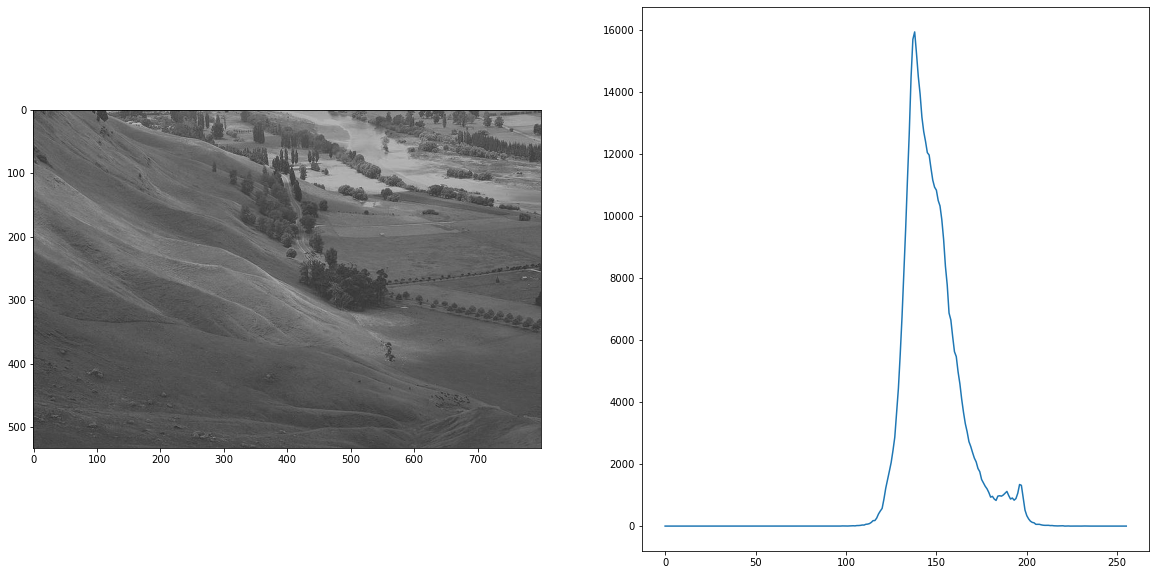

In [5]:
image = cv2.imread('images/Hawkes_Bay_NZ.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image, cmap='gray')
ax2.plot(hist)

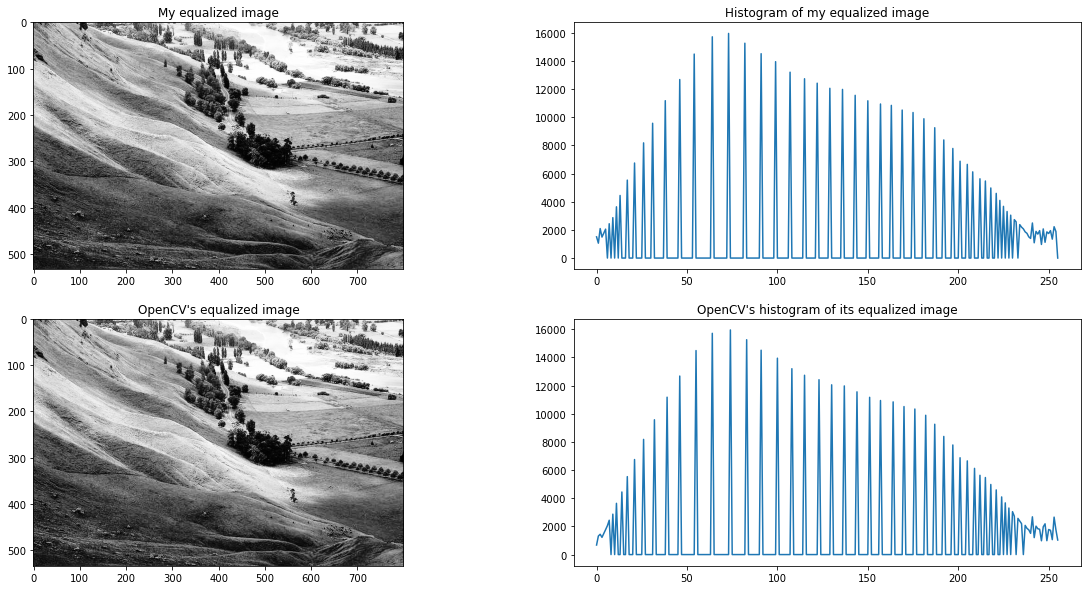

In [6]:
# TODO: Compare your results with the OpenCV implementation of histogram equalization. Plot the histogram of the equalized image with your 
# implementation and the histogram of the equalized image with OpenCV's implementation.

my_hist = cv2.calcHist([intense_bay], [0], None, [256], [0, 256])

bay_cpy = np.copy(bay)
opencv_eq = cv2.equalizeHist(bay_cpy)
opencv_hist = cv2.calcHist([opencv_eq], [0], None, [256], [0, 256])

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))

ax1.set_title('My equalized image')
ax1.imshow(intense_bay, cmap='gray')
ax2.set_title('Histogram of my equalized image')
ax2.plot(my_hist)

ax3.set_title("OpenCV's equalized image")
ax3.imshow(opencv_eq, cmap='gray')
ax4.set_title("OpenCV's histogram of its equalized image")
ax4.plot(opencv_hist)

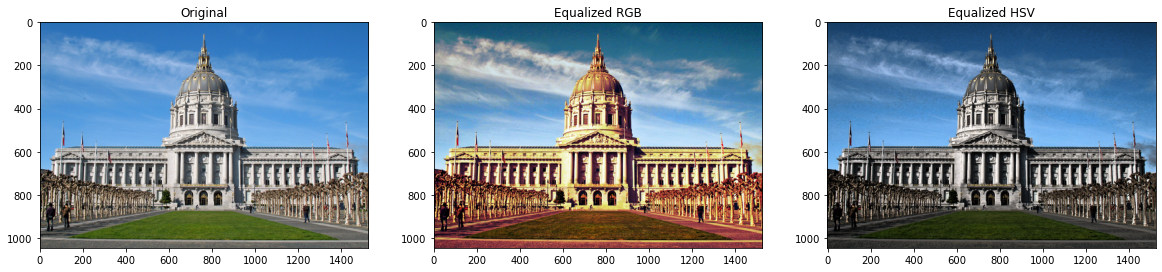

In [7]:
# TODO: Apply your function and do histogram equalization on a color image. Apply the equalization on an RGB image first. Then on the HSV 
# version of the image. Plot a figure with each resulting image. 

# NOTE: for Hue, the range of values goes from 0 to 180, while S and V, go from 0 to 255. 

city_hall = cv2.imread('../Notebooks/images/city_hall.jpg')
city_hall_rgb = cv2.cvtColor(city_hall, cv2.COLOR_BGR2RGB)
city_hall_hsv = cv2.cvtColor(city_hall, cv2.COLOR_BGR2HSV)

R, G, B = cv2.split(city_hall_rgb)
H, S, V = cv2.split(city_hall_hsv)

norm_hist_values_R = norm_hist(R)
cumulative_sum_R = cumulative_dist_func(norm_hist_values_R)
intense_R = lookout_table(R, cumulative_sum_R)

norm_hist_values_G = norm_hist(G)
cumulative_sum_G = cumulative_dist_func(norm_hist_values_G)
intense_G = lookout_table(G, cumulative_sum_G)

norm_hist_values_B = norm_hist(B)
cumulative_sum_B = cumulative_dist_func(norm_hist_values_B)
intense_B = lookout_table(B, cumulative_sum_B)

# norm_hist_values_H = norm_hist(H)
# cumulative_sum_H = cumulative_dist_func(norm_hist_values_H)
# intense_H = lookout_table(H, cumulative_sum_H)

# norm_hist_values_S = norm_hist(S)
# cumulative_sum_S = cumulative_dist_func(norm_hist_values_S)
# intense_S = lookout_table(S, cumulative_sum_S)

norm_hist_values_V = norm_hist(V)
cumulative_sum_V = cumulative_dist_func(norm_hist_values_V)
intense_V = lookout_table(V, cumulative_sum_V)

intense_ch_rgb = cv2.merge([intense_R, intense_G, intense_B])
intense_ch_hsv = cv2.merge([H, S, intense_V])

ch_eq_rgb = cv2.cvtColor(intense_ch_hsv, cv2.COLOR_HSV2RGB)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Original')
ax1.imshow(city_hall_rgb, cmap='gray')

ax2.set_title('Equalized RGB')
ax2.imshow(intense_ch_rgb, cmap='gray')

ax3.set_title('Equalized HSV')
ax3.imshow(ch_eq_rgb, cmap='gray')

In [8]:
# TODO: For each of the images of people in the image folder, apply histogram equalization, and then detect faces with haar cascades. For
# each image, plot the result of the face detection without applying histogram equalization, and after applying histogram equalization. 